# Entrenamiento inicial del modelo

In [ ]:
pip install ucimlrepo 

^C


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.6 MB 16.8 MB/s eta 0:00:01
   -------- ------------------------------- 2.6/11.6 MB 27.5 MB/s eta 0:00:01
   --------------- ------------------------ 4.5/11.6 MB 32.2 MB/s eta 0:00:01
   ---------------------- ----------------- 6.6/11.6 MB 32.4 MB/s eta 0:00:01
   ----------------------------- ---------- 8.5/11.6 MB 34.1 MB/s eta 0:00:01
   ------------------------------------ --- 10.6/11.6 MB 38.5 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 36.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------ --------------------------------- 2.2/12.9 MB 69.4 MB/s eta 0:00:01
   ----------- ---------------------------- 3.6/12.9 MB 45.6 MB/s eta 0:00:01
   -


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\futbo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
pip install scikit-learn


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 660.6 kB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 9.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/11.1 MB 21.2 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/11.1 MB 22.5 MB/s eta 0:00:01
   ----------------- ---------------------- 5.0/11.1 MB 26.6 MB/s eta 0:00:01
   ------------------------ --------------- 6.9/11.1 MB 29.4 MB/s eta 0:00:01
   ------------------------------ --------- 8.6/11.1 MB 32.3 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 32.7 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 34.4 MB/s eta 0:00:00
Using cach


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\futbo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\futbo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Importar el dataset

In [14]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
# Fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# Data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

### Codificar y entrenar el modelo

In [ ]:

# Crear un diccionario de LabelEncoders para cada columna categórica en X
encoders = {}
X_encoded = X.copy()

for col in X.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    encoders[col] = le  # Guardar el encoder para la API

# Codificar la variable objetivo
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

# Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_encoded, y_encoded)



C:\Users\futbo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Exportar el modelo con el encoder

In [23]:
# Guardar el modelo y los encoders
with open("model.pkl", "wb") as f:
    pickle.dump((model, label_encoder_y, encoders), f)

## Crear la API con FastAPI

In [19]:
pip install fastapi uvicorn numpy scikit-learn pydantic


   ---------------------------------------- 0.0/62.3 kB ? eta -:--:--
   ------------------- -------------------- 30.7/62.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 62.3/62.3 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/98.2 kB ? eta -:--:--
   ---------------------------------------- 98.2/98.2 kB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\futbo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
pip install fastapi[all]


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\futbo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Creacion de la API con FastAPI y el decodificador

In [4]:
import os
import pickle
from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np
import pandas as pd
import uvicorn 

# Cargar el modelo y los encoders
model_path = os.path.join(os.getcwd(), "model.pkl")
with open(model_path, "rb") as f:
    model, label_encoder_y, encoders = pickle.load(f)

# Inicializar la aplicación FastAPI
app = FastAPI()

# Definir la estructura de la solicitud
class CarFeatures(BaseModel):
    buying: str
    maint: str
    doors: str
    persons: str
    lug_boot: str
    safety: str

# Función para codificar los valores categóricos
def encode_input(data: dict):
    encoded = []
    for key, value in data.items():
        encoded.append(encoders[key].transform([value])[0])
    return np.array(encoded).reshape(1, -1)

# Endpoint para realizar predicciones
@app.post("/predict")
def predict(car: CarFeatures):
    # Convertir los datos a diccionario
    input_data = car.dict()
    
    # Codificar los valores de entrada
    encoded_input = encode_input(input_data)
    
    # Hacer la predicción
    prediction_encoded = model.predict(encoded_input)[0]
    
    # Decodificar la predicción
    prediction = label_encoder_y.inverse_transform([prediction_encoded])[0]
    
    return {"prediction": prediction}

# Endpoint raíz
@app.get("/")
def root():
    return {"message": "API de Clasificación de Autos funcionando"}




## Ejecucion desde la terminal

In [1]:
uvicorn main:app --reload

SyntaxError: invalid syntax (3807844594.py, line 1)

Ejecutamos la aplicacion de la siguiente manera:


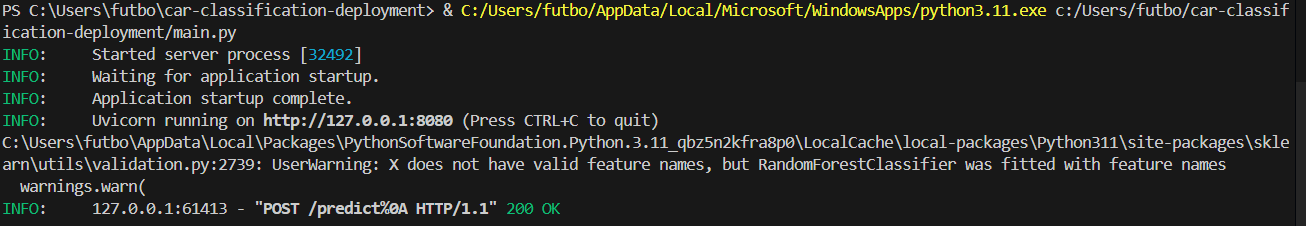

## Ahora vamos a probar el entorno con  Postman de la siguiente manera

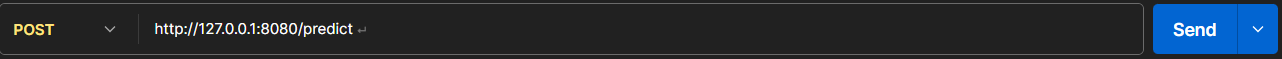

Con el archivo jason de la siguiente manera:

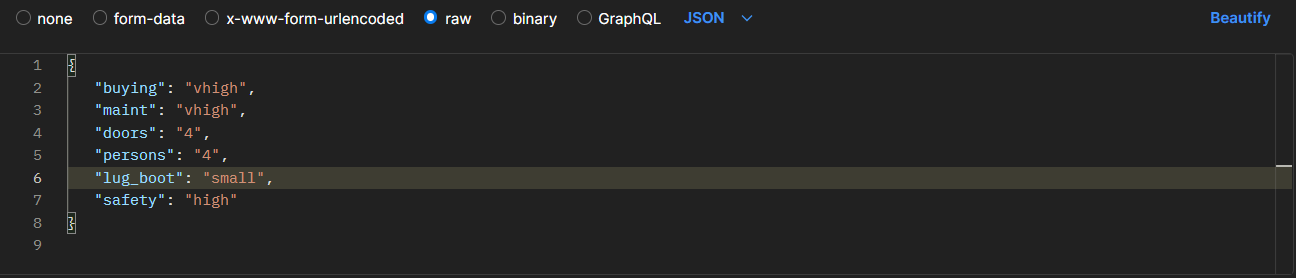

## Llegamos a una respuesta como la siguiente:


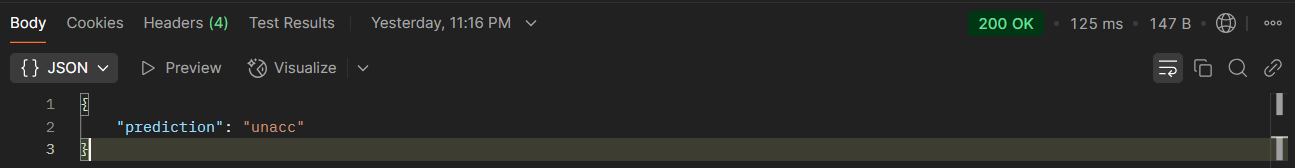

## Ahora para monitorear el proceso tenemos el archivo log

Configuramos el archivo main de la siguiente manera:

añadimos la siguiente configuracion en la API:
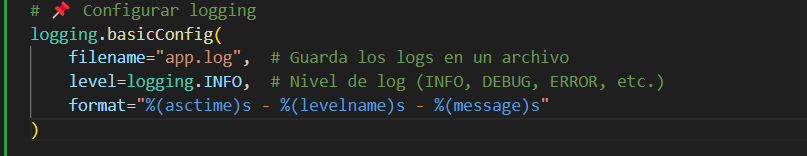

Llegamos un resultado como el siguiente:

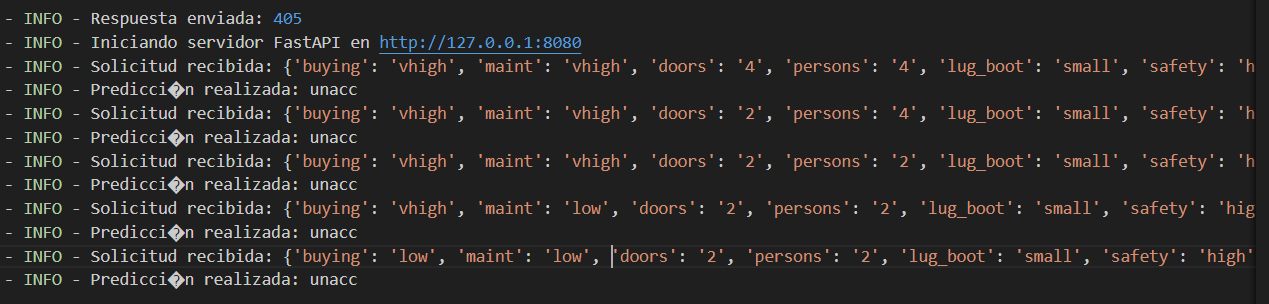